In [1]:
import numpy as np
import scipy.stats
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/df_for_analysis_ESS569.csv")
data

,Unnamed: 0,RBR,X,Y,AET_1981_2010,dist_streams_wetlands,ESI,FRS,T_max_bpd,pct_canopy_cover,canopy_rumple,pctl_25_canopy_height,pctl_95_canopy_height,Pct_1_tree_clumps,Pct_2_4_tree_clumps,Pct_5_9_tree_clumps,Pct_gteq10_tree_clumps,topo_aspect,topo_curvature_45,topo_plan_curvature,topo_slope_135,topo_SRI,topo_SRI_270,topo_TPI_4000,topo_TPI_500,SCF,wind_northsouthness,Rx,EVT_PP
0,2,-37,-121.171368,42.875915,511.204498,590.118835,0.286460,0.747711,300.200012,36.245998,3.1707,7.4718,27.210400,66.700352,33.299648,0.000000,0.000000,300.809815,0.1247,0.0529,2.1989,1.6568,1.7398,3425,-145,0.394521,-0.358369,1,1
1,4,28,-121.169751,42.875915,505.196411,593.939331,0.286168,0.652768,300.200012,29.762400,2.8007,6.7881,17.803499,84.522549,10.935846,4.541605,0.000000,191.077499,0.0419,-0.0972,1.1191,1.7170,1.7190,4391,496,0.394521,-0.309018,1,0
2,5,15,-121.168943,42.875915,501.738190,604.984253,0.363935,0.652768,300.200012,41.500401,1.6505,3.1389,10.309300,44.027312,26.891582,29.081106,0.000000,152.380295,0.0268,0.0137,1.2881,1.7260,1.7175,4494,409,0.416438,-0.309018,1,1
3,6,53,-121.168134,42.875915,501.738190,622.341003,0.363935,0.652768,300.200012,36.487499,1.5788,3.0088,15.406100,33.496929,58.477816,8.025255,0.000000,148.526703,0.0280,0.0057,3.2469,1.7323,1.7159,4588,290,0.416438,-0.309018,1,1
4,7,24,-121.167326,42.875915,500.982483,645.436951,0.371361,0.744375,300.200012,29.987700,1.6197,3.8044,15.312500,55.964361,44.035639,0.000000,0.000000,155.400497,0.0478,-0.0161,4.2316,1.7385,1.7151,4665,251,0.416438,-0.342021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1870,146,-121.174602,42.767578,502.809448,347.596161,0.250840,0.564972,305.600006,25.365299,2.7192,10.7279,17.350000,64.456624,35.543376,0.000000,0.000000,221.225601,-0.0022,0.0391,0.6673,1.7155,1.7050,-1161,97,0.238356,0.453990,1,0
1821,1871,106,-121.173794,42.767578,502.809448,284.775421,0.250840,0.564972,305.600006,18.789801,2.3913,9.6697,20.144100,0.000000,100.000000,0.000000,0.000000,229.451004,0.0044,0.0980,0.7321,1.7154,1.7070,-1079,154,0.238356,0.453990,1,0
1822,1872,88,-121.172985,42.767578,503.752472,222.331650,0.304767,0.564972,305.600006,56.083500,1.2452,8.4023,17.360201,14.985881,21.223734,31.816348,31.974036,187.759201,0.0112,-0.0290,0.4245,1.7347,1.7086,-946,298,0.224658,0.453990,1,0
1823,1873,62,-121.172177,42.767578,503.474762,149.571381,0.238114,0.564972,305.600006,54.690899,2.2616,10.8837,20.153099,8.276953,52.297396,26.916525,12.509126,174.710998,-0.0654,0.1156,0.6271,1.7239,1.7072,-903,377,0.224658,0.438370,1,0


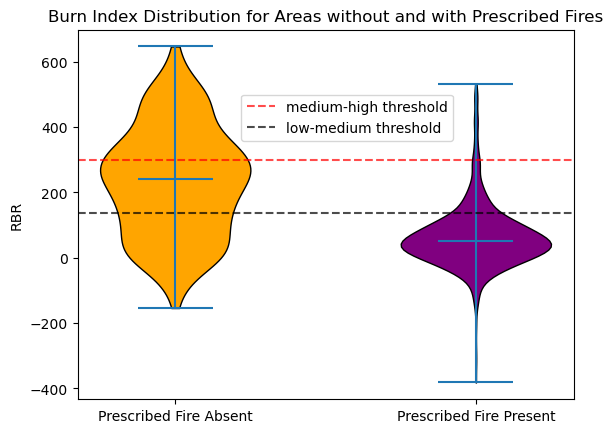

In [5]:
# RBR_Rx0s = []
# RBR_Rx1s = []
# for i, val in enumerate(data['Rx']):
#     if val == 0:
#         RBR_Rx0s.append(data['RBR'][i])
#     if val == 1:
#         RBR_Rx1s.append(data['RBR'][i])

RBR_Rx0s = [data['RBR'][i] for i, val in enumerate(data['Rx']) if val == 0]
RBR_Rx1s = [data['RBR'][i] for i, val in enumerate(data['Rx']) if val == 1]

parts = plt.violinplot([RBR_Rx0s, RBR_Rx1s], [0, 1], showmedians=True)


violins = parts['bodies']
for v in violins:
    v.set_edgecolor('k')
    v.set_alpha(1)
violins[0].set_facecolor('orange')
violins[1].set_facecolor('purple')

    
plt.xticks([0, 1], labels=["Prescribed Fire Absent", "Prescribed Fire Present"])
plt.ylabel("RBR")
plt.title("Burn Index Distribution for Areas without and with Prescribed Fires")
plt.axhline(300, linestyle='--', color='r', alpha=0.7, label="medium-high threshold") # burn index medium-high threshold
plt.axhline(136, linestyle='--', color='k', alpha=0.7, label="low-medium threshold") # burn index low-medium threshold 
plt.legend(loc=[0.33, 0.7])

# MEETING NOTES

# make them different colors
# prescribed fires absent or present

# make violin plot for EVT PP
# x ticks dominant and nondominent

# histograms of each variable
# ^ subplots
# MOVE STATS OUT OF PLOT LOOP

# subplots scatter everything against RBR

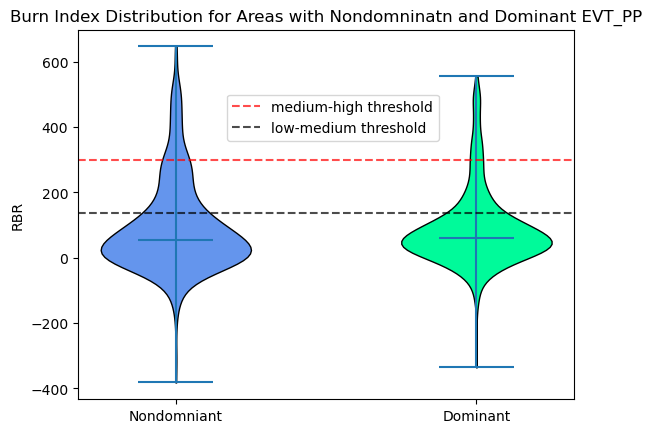

In [33]:
RBR_EVTPP0 = [data['RBR'][i] for i, val in enumerate(data['EVT_PP']) if val == 0]
RBR_EVTPP1 = [data['RBR'][i] for i, val in enumerate(data['EVT_PP']) if val == 1]

parts = plt.violinplot([RBR_EVTPP0, RBR_EVTPP1], [0, 1], showmedians=True)

violins = parts['bodies']
for v in violins:
    v.set_edgecolor('k')
    v.set_alpha(1)
violins[0].set_facecolor('cornflowerblue')
violins[1].set_facecolor('mediumspringgreen')

plt.xticks([0, 1], labels=["Nondomniant", "Dominant"])
plt.ylabel("RBR")
plt.title("Burn Index Distribution for Areas with Nondomninatn and Dominant EVT_PP")
plt.axhline(300, linestyle='--', color='r', alpha=0.7, label="medium-high threshold") # burn index medium-high threshold
plt.axhline(136, linestyle='--', color='k', alpha=0.7, label="low-medium threshold") # burn index low-medium threshold 
plt.legend(loc=[0.3, 0.7])

In [23]:
analog_vars = data.drop(columns=['Unnamed: 0', 'RBR', 'X', 'Y', 'Rx', 'EVT_PP']) # isolating continuous variables for analysis

stats = {} #instantiate dict

for var in analog_vars:
    mean = np.mean(data[var]) #calculate mean
    median = np.median(data[var]) # calculate median
    variance = scipy.stats.variation(data[var]) # calculate variance
    kurtosis = scipy.stats.kurtosis(data[var]) # calculate kurtosis
    normality = scipy.stats.shapiro(data[var])[1] # calculate normality via Shapiro-Wilk
    stats[var] = {"mean": mean,
                "median": median,
                "variance": variance,
                "kurtosis": kurtosis,
                "normality": normality} # enter var stats into dict

stats_df = pd.DataFrame.from_dict(stats)
display(stats_df.T) # show transpose of dataframe

,mean,median,variance,kurtosis,normality
AET_1981_2010,497.645108,498.058563,0.018374,-0.100091,6.841525e-06
dist_streams_wetlands,301.603877,256.512817,0.745351,-0.640629,1.206388e-26
ESI,0.311384,0.307191,0.151182,0.080215,1.279974e-08
FRS,0.652043,0.636571,0.101265,-0.748890,1.261847e-21
T_max_bpd,302.073036,302.799988,0.004520,-0.584012,1.033792e-38
pct_canopy_cover,41.327726,41.687901,0.292993,-0.403470,3.572863e-08
canopy_rumple,2.777495,2.719200,0.271477,0.189513,9.251215e-08
pctl_25_canopy_height,8.192039,7.427400,0.422731,1.543436,8.760923e-30
pctl_95_canopy_height,21.753912,20.788799,0.302518,-0.430169,6.804063e-14
Pct_1_tree_clumps,43.648888,39.872741,0.580262,-0.444403,7.627725e-23


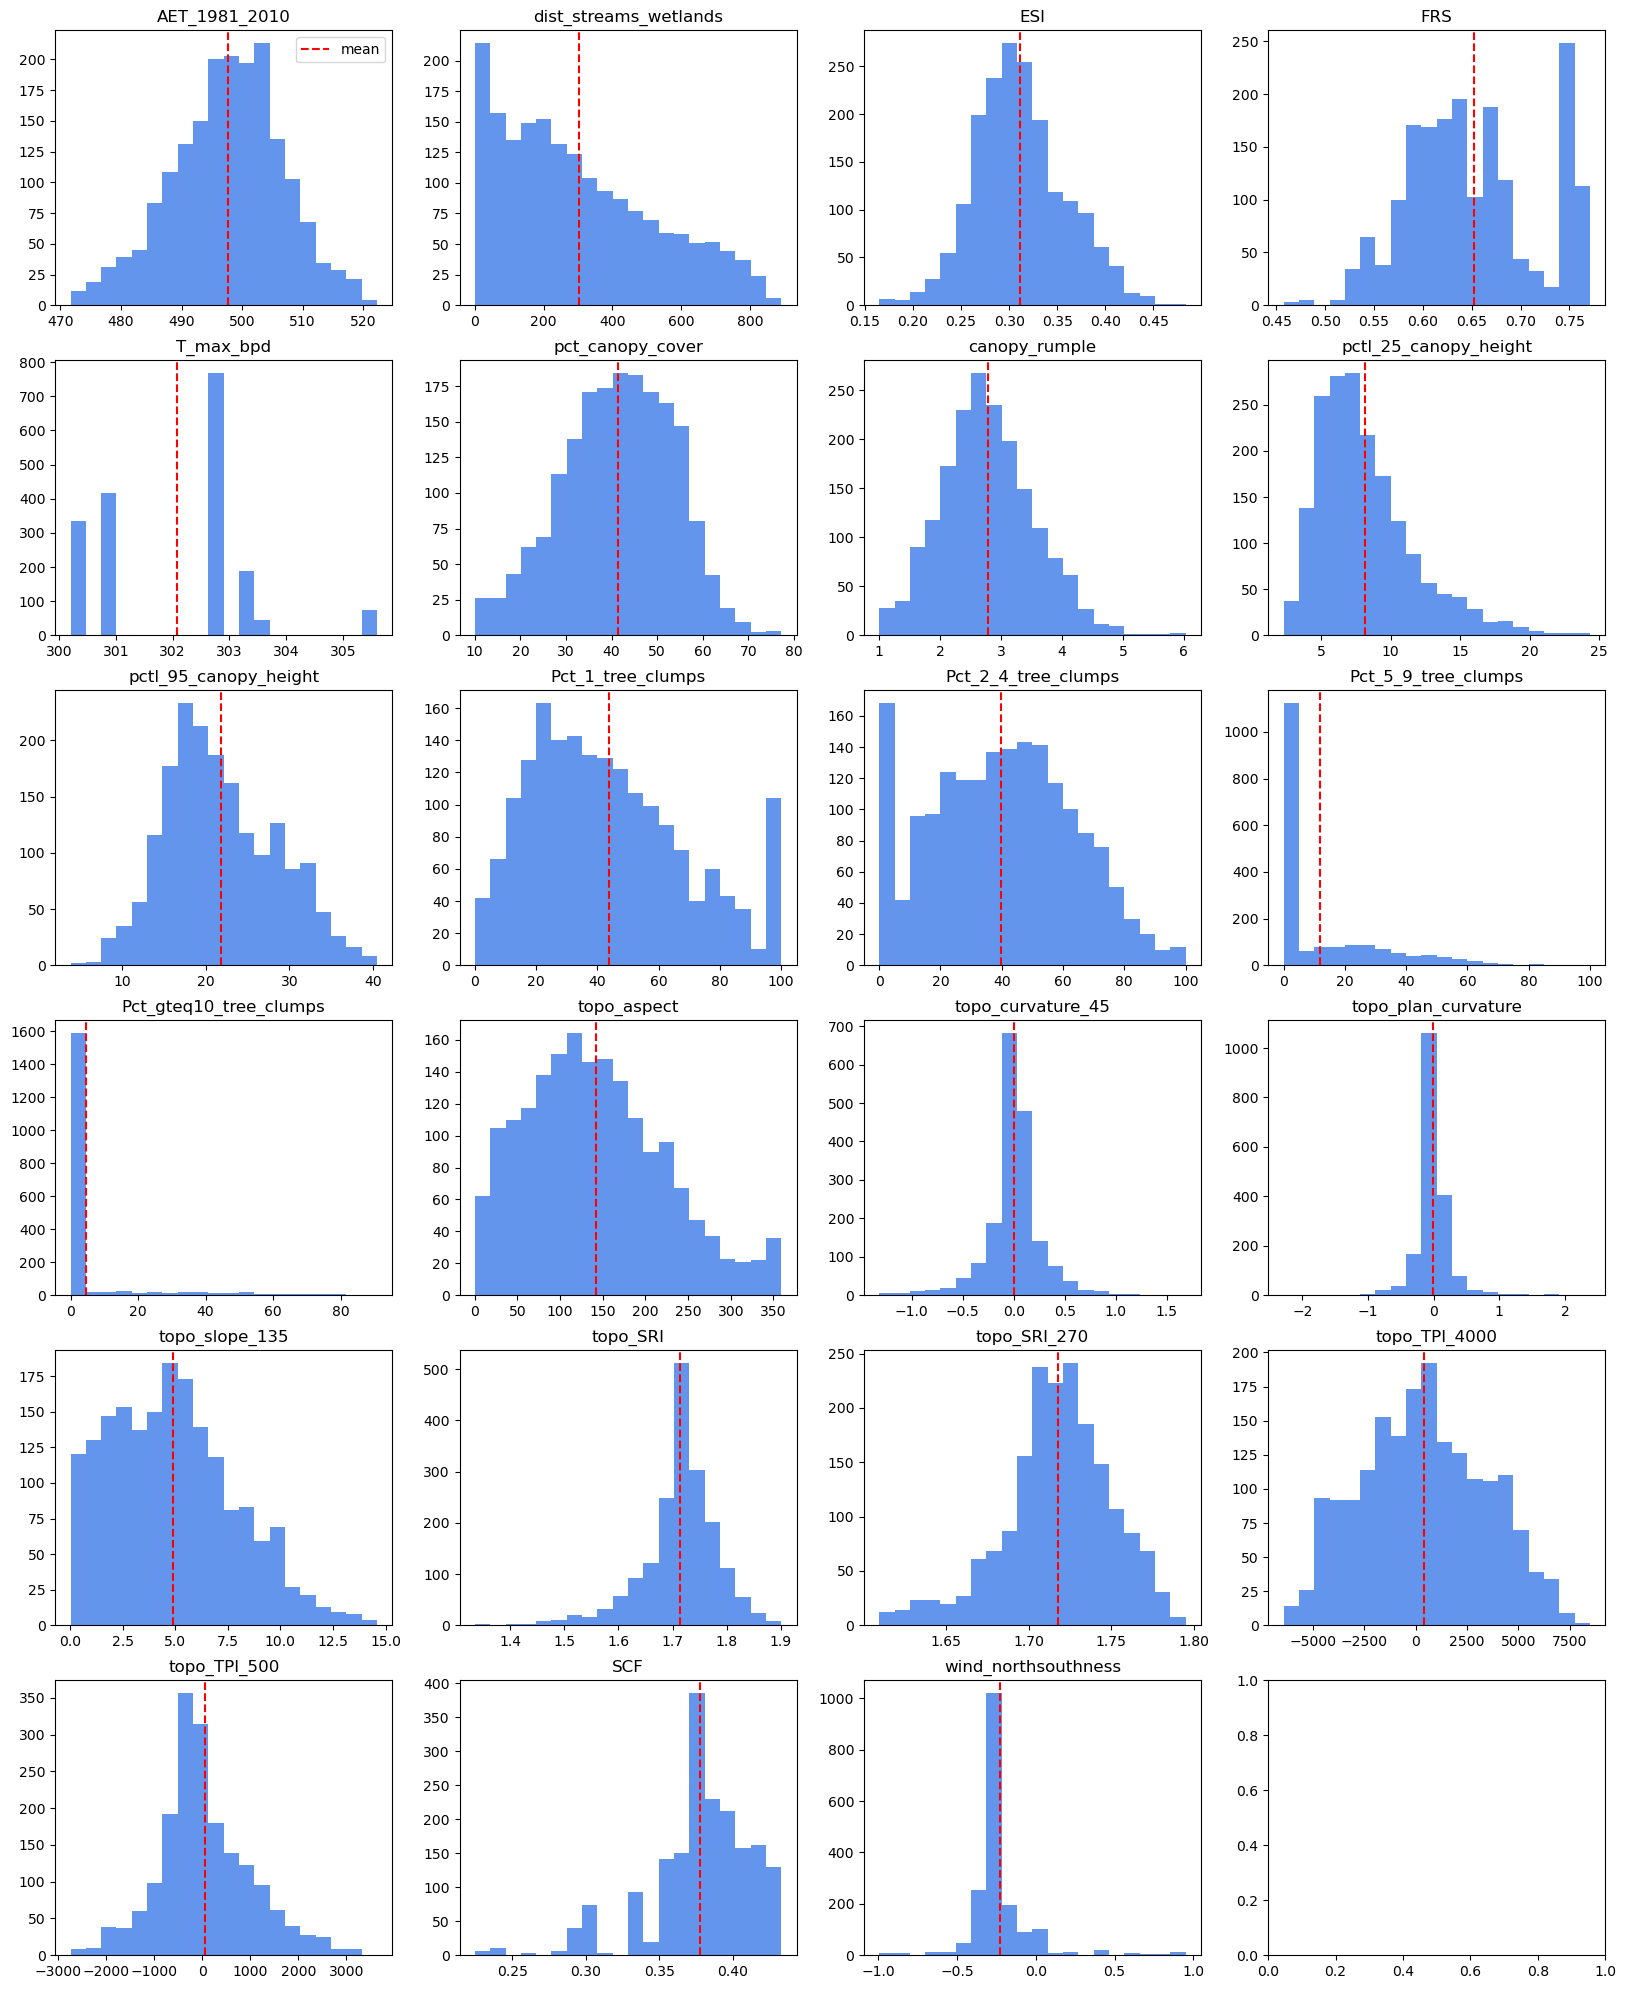

In [13]:
ncols = 4 # change to whatever you'd like!
nrows = int( np.ceil( (len(analog_vars.keys())/ncols) ) )

fig, ax = plt.subplots(nrows, ncols, figsize=(5*ncols, 100/ncols))

col_order = list(np.arange(ncols))*nrows
row_order = []
for i in np.arange(nrows):
    for j in np.arange(ncols):
        row_order.append(i)
        
for r, c, var in zip(row_order, col_order, analog_vars): # loop through each continuous variable
    ax[r][c].hist(data[var], 20, color='cornflowerblue') # make histogram of var
    ax[r][c].set_title(var) # tile histogram w/ var string
    ax[r][c].axvline(stats_df[var]['mean'], c='r', ls='--', alpha=1, label='mean') # make vertical mean line
    
ax[0][0].legend()

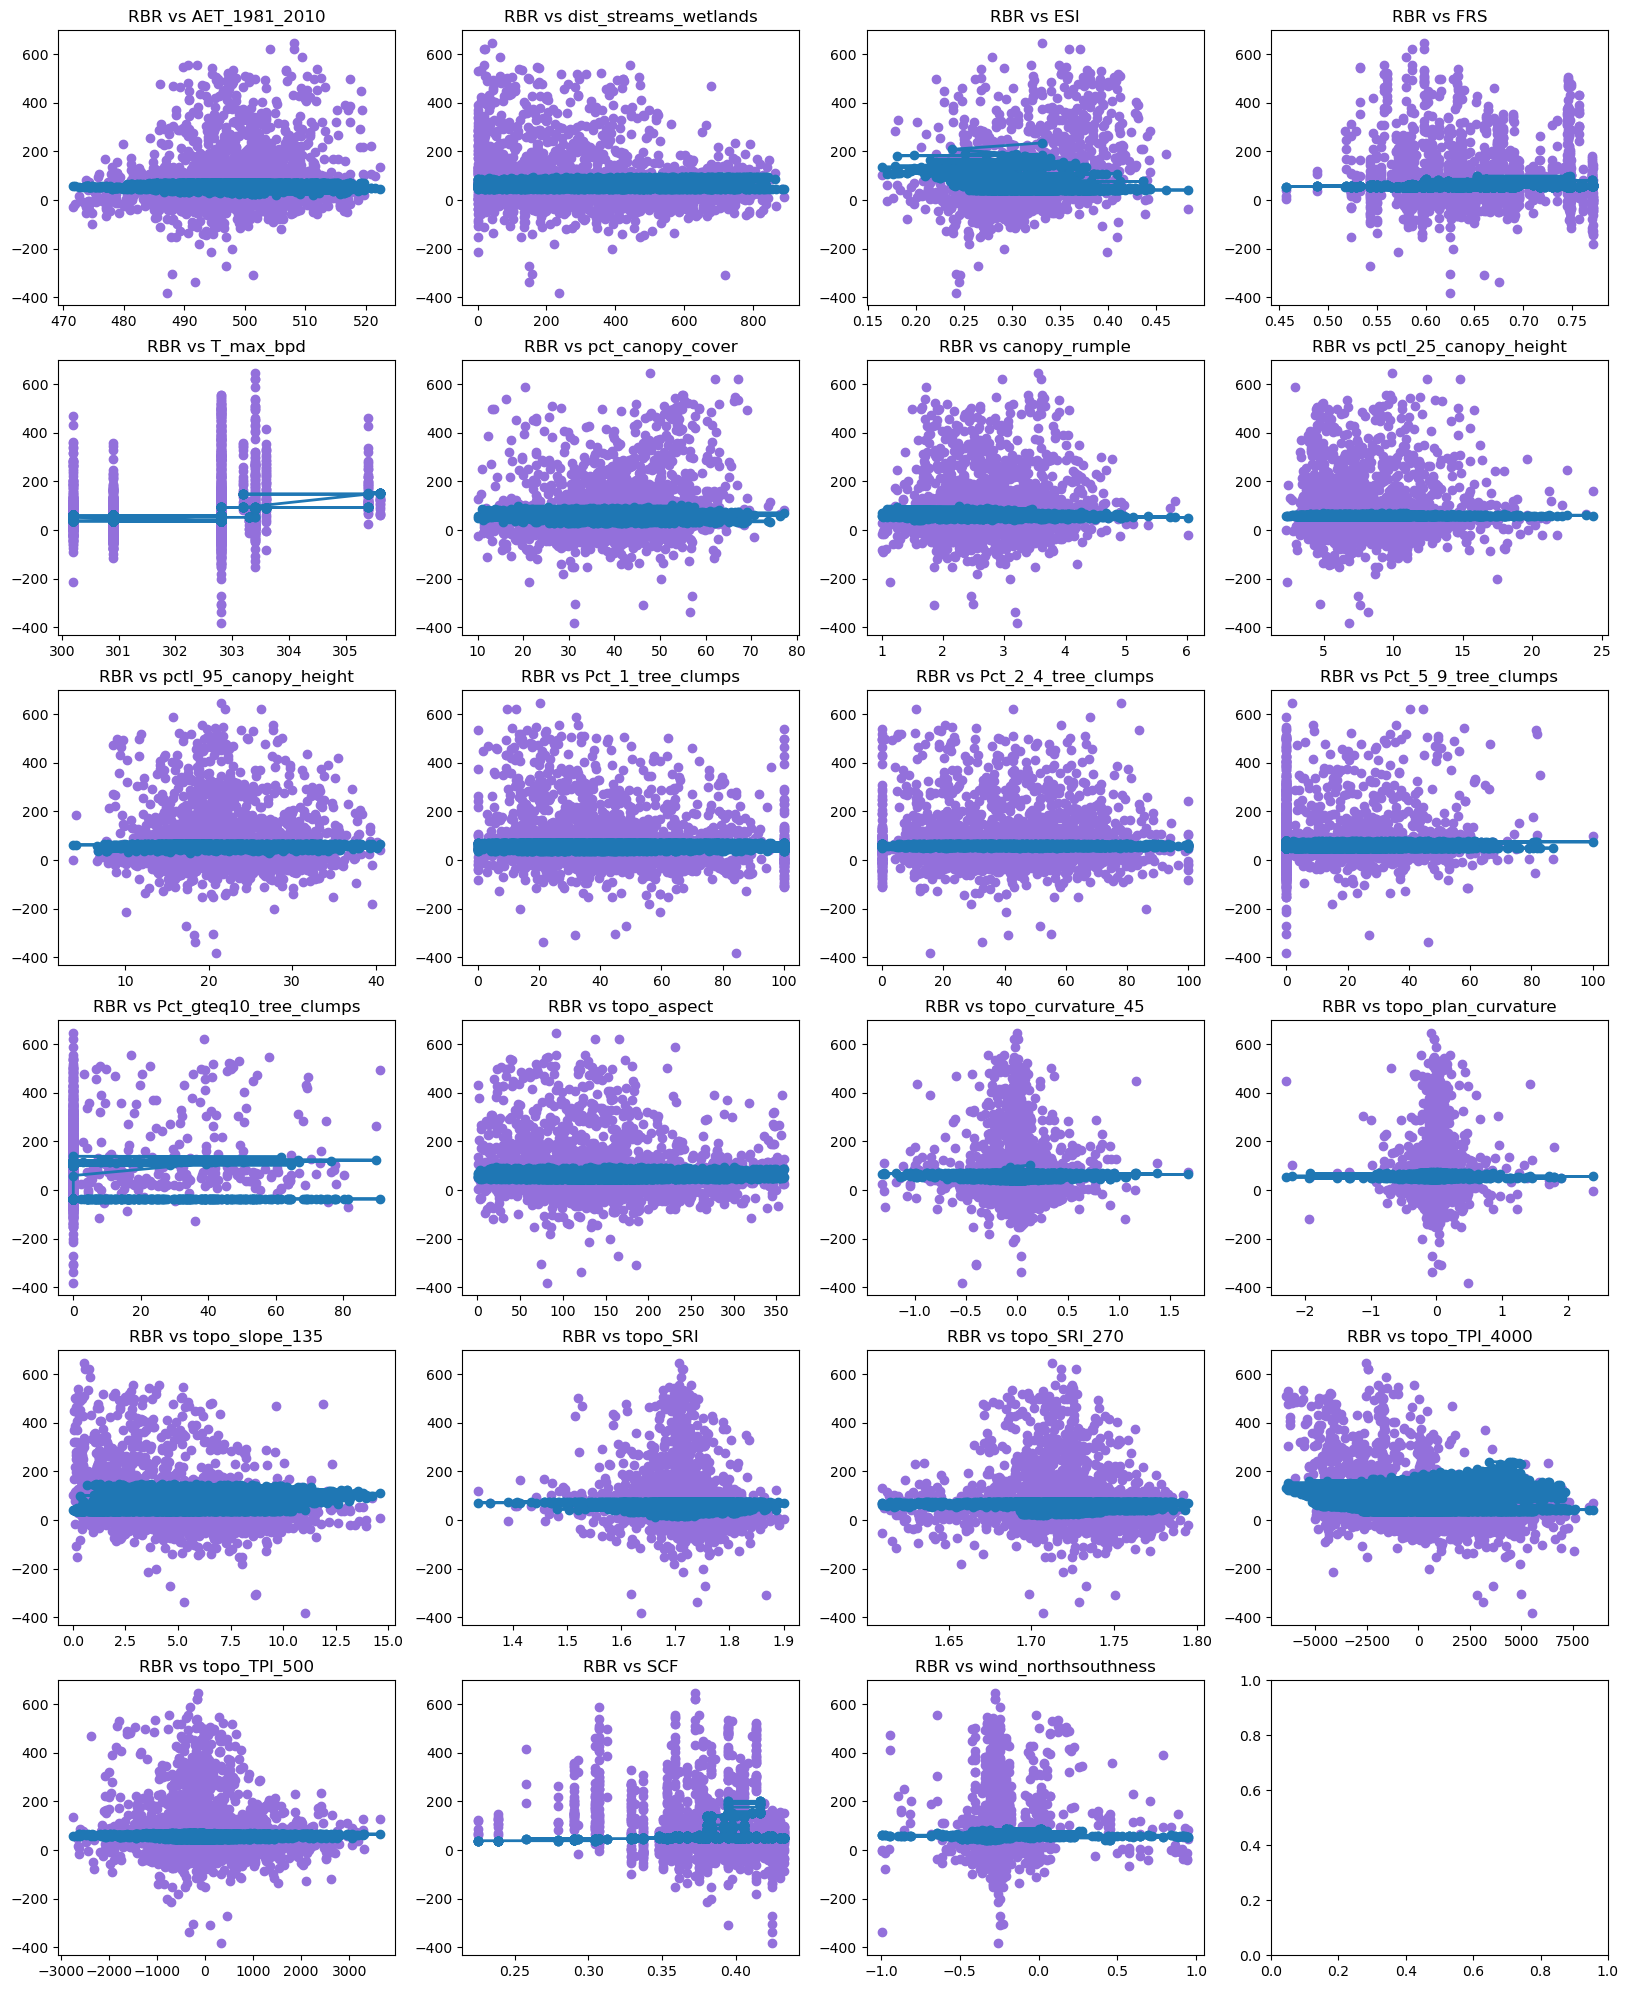

In [32]:
from statsmodels.nonparametric.smoothers_lowess import lowess

ncols = 4 # change to whatever you'd like!
nrows = int( np.ceil( (len(analog_vars.keys())/ncols) ) )

fig, ax = plt.subplots(nrows, ncols, figsize=(5*ncols, 100/ncols))

col_order = list(np.arange(ncols))*nrows
row_order = []
for i in np.arange(nrows):
    for j in np.arange(ncols):
        row_order.append(i)

for r, c, var in zip(row_order, col_order, analog_vars): # loop through each continuous variable
    ax[r][c].scatter(data[var], data['RBR'], c='mediumpurple') # make scatterplot of var vs RBR
    ax[r][c].set_title(f"RBR vs {var}") # tile scatterplot

    fit = lowess(data['RBR'], data[var])[:,1]
    ax[r][c].plot(data[var], fit, 'o-', lw=2)


# for var in analog_vars
#     sns.regplot(var, "RBR", data=analog_vars,  color="grey", scatter_kws={"s": 10},
#                 line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True)